In [510]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import math
import csv
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We are using the School Finances Dataset. 

import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [511]:
df = pd.read_csv('elsec15.csv')

C:\Users\brand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [512]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


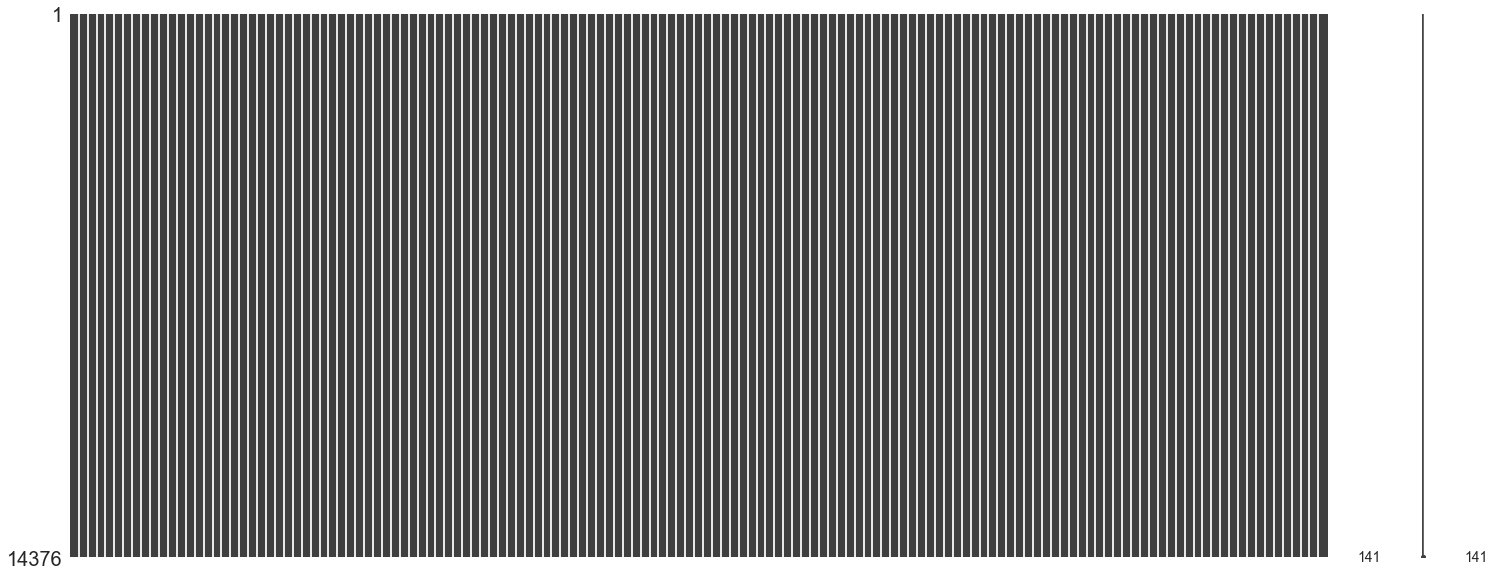

In [513]:
msno.matrix(df)

In [514]:
df.shape

(14376, 141)

In [515]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [516]:
df["CSA"].describe()

count     14376
unique      170
top           N
freq       6892
Name: CSA, dtype: object

In [517]:
df.replace(0, float("NAN"), inplace=True)
df.replace("N", float("NAN"), inplace=True)

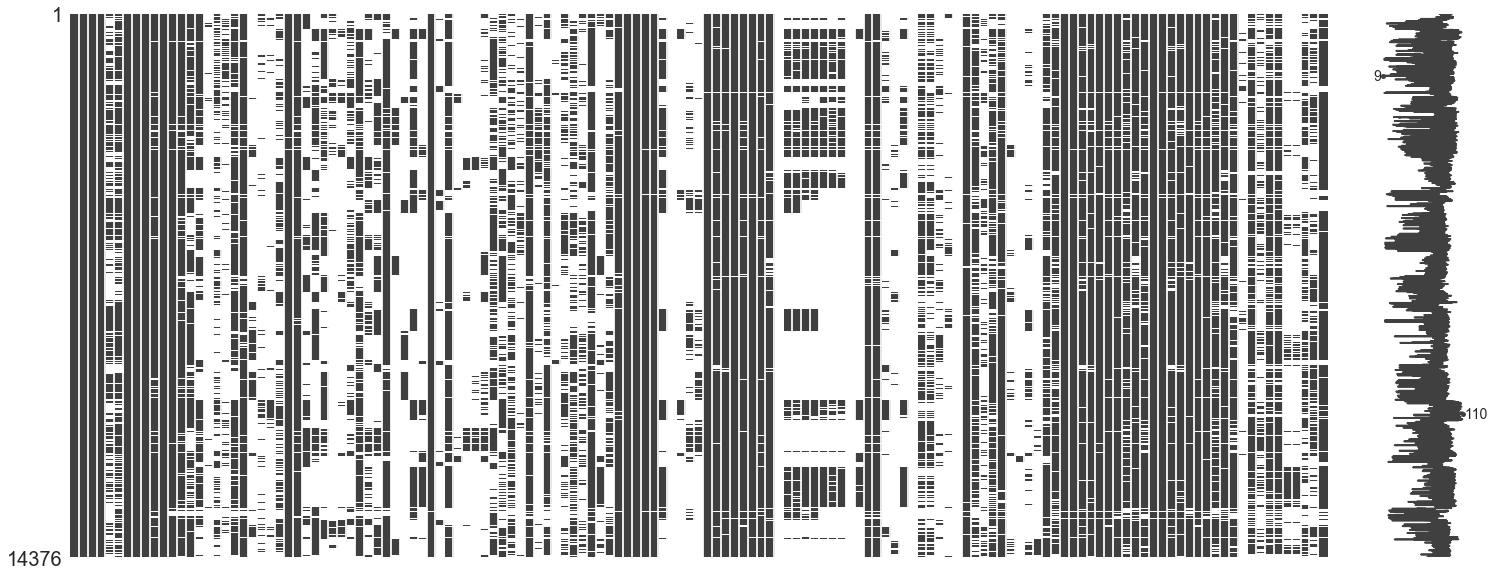

In [518]:
msno.matrix(df)

In [519]:
df = df.dropna(axis=1,thresh=8000, how='all')

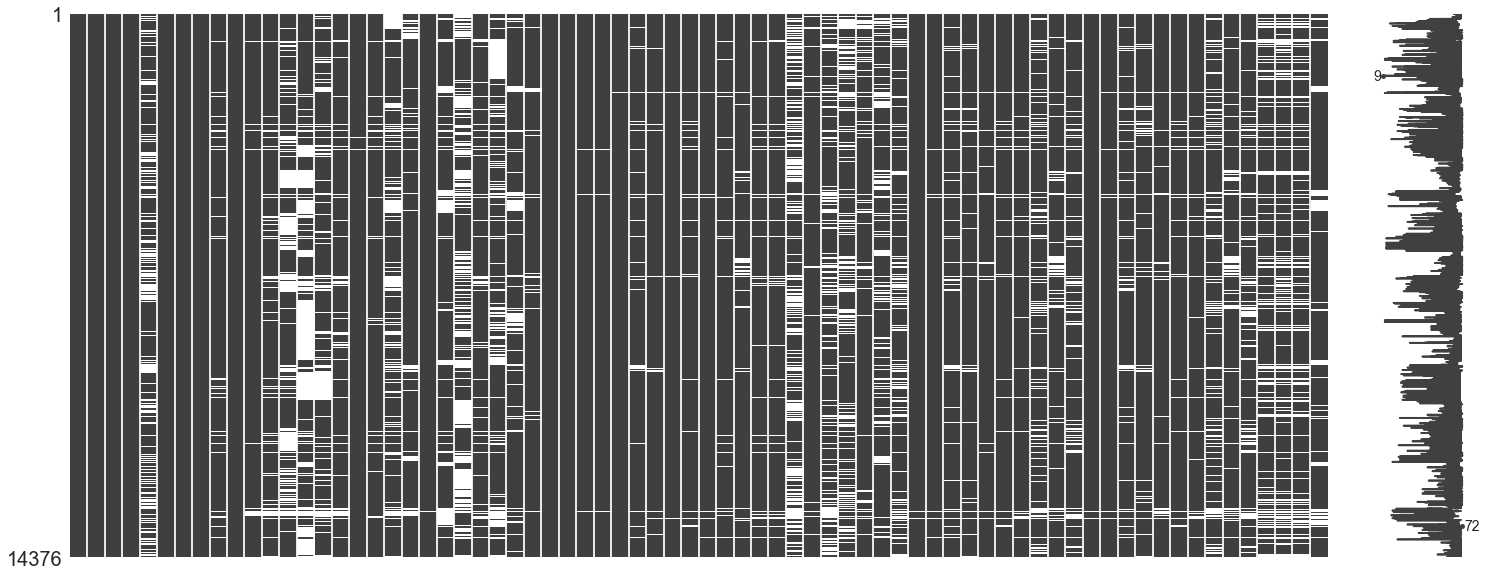

In [520]:
msno.matrix(df)

In [521]:
df.shape

(14376, 72)

In [522]:
df = df.dropna(axis=0,thresh=40, how='all')

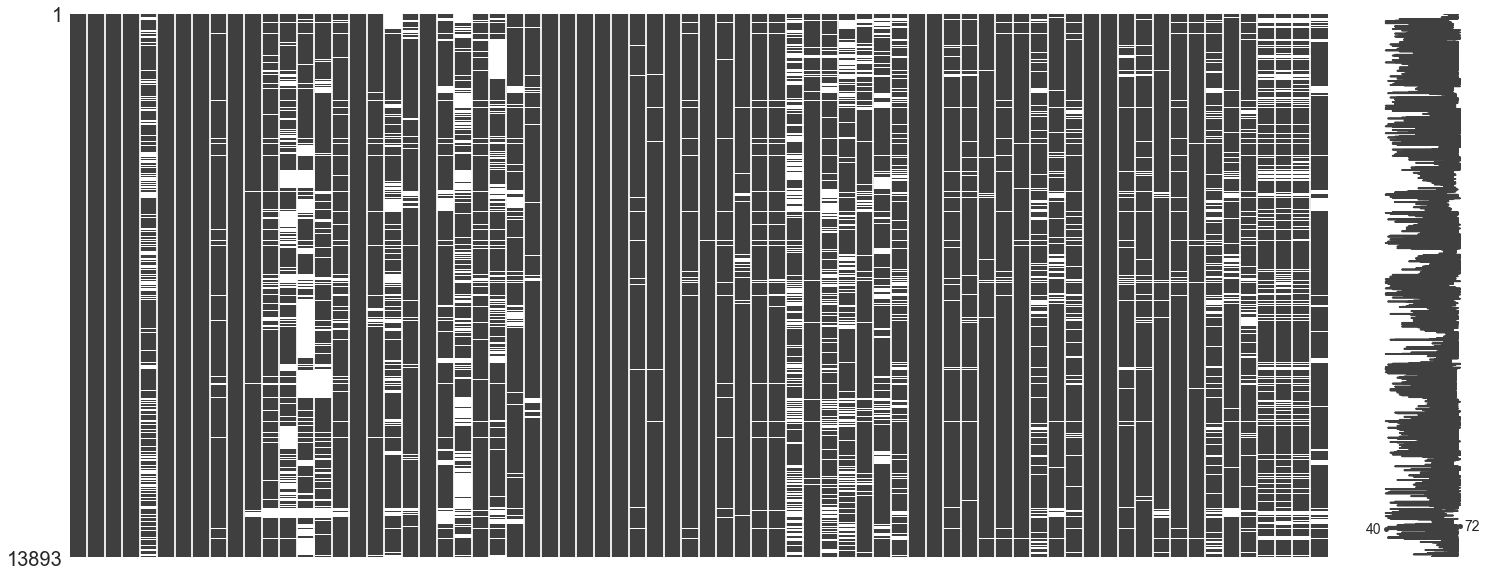

In [523]:
msno.matrix(df)

In [524]:
df.shape

(13893, 72)

In [525]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33', 'TOTALREV', 'TFEDREV', 'C14', 'C15', 'C16', 'C20',
       'C25', 'TSTREV', 'C01', 'C10', 'C13', 'TLOCREV', 'T06', 'D11', 'A09',
       'A13', 'U22', 'U97', 'TOTALEXP', 'TCURELSC', 'TCURINST', 'E13',
       'TCURSSVC', 'E17', 'E07', 'E08', 'E09', 'V40', 'V45', 'V90', 'TCUROTH',
       'E11', 'NONELSEC', 'TCAPOUT', 'F12', 'K09', 'K10', 'Q11', 'I86', 'Z32',
       'Z33', 'V11', 'V13', 'V15', 'V17', 'V21', 'V23', 'V37', 'V29', 'Z34',
       'V10', 'V12', 'V14', 'V16', 'V18', 'V22', 'V24', 'V38', 'V30', '_19H',
       '_31F', '_41F', 'W61'],
      dtype='object')

In [526]:

mydict = {}
with open('School Data Labels.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        mydict[row[0]] = row[1]

for key in mydict:
    print("Code: ", key, "| Label: ",mydict[key])

Code:  STATE | Label:  State Identification Number
Code:  NAME | Label:  School System Name
Code:  CONUM | Label:  ANSI State and County Code
Code:  CBSA | Label:  Core-Based Statistical Area
Code:  SCHLEV | Label:  School Level Code
Code:  V33 | Label:  Fall Membership
Code:  TOTALREV | Label:  TOTAL ELEMENTARY-SECONDARY REVENUE
Code:  TFEDREV | Label:  TOTAL ELEMENTARY-SECONDARY REVENUE
Code:  C14 | Label:  Federal revenue through the state - Title I
Code:  C15 | Label:  Federal revenue through the state - Children with disabilities - IDEA
Code:  C16 | Label:  Federal revenue through the state - Math, science, and teacher quality
Code:  C20 | Label:  Federal revenue through the state - All other
Code:  TSTREV | Label:  Total Revenue from State Sources
Code:  C01 | Label:  General formula assistance
Code:  C10 | Label:  School lunch programs
Code:  C13 | Label:  All other revenues from state sources
Code:  TLOCREV | Label:  Total Revenue from Local Sources
Code:  T06 | Label:  Propert

In [527]:
df.replace(float("NAN"), 0, inplace=True)

In [528]:
df.drop("YRDATA", axis=1,inplace=True)     #Its all 2015
df.drop("IDCENSUS", axis=1, inplace=True)
df.drop("NCESID", axis=1, inplace=True)

In [529]:
fa_enrollment = pd.DataFrame()

In [530]:
fa_enrollment['V33'] = df['V33'].dropna()

In [531]:
fa_enrollment.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001941A686B70>]], dtype=object)

https://nces.ed.gov/pubs2012/2012001.pdf
Page 170: Average enrollment size 693


In [532]:
def group_pop(x): 
    if x >= 50000:
        return "Greater than 50,000"
    elif x < 50000 and x >= 10000:
        return "Greater than 9,999 and less than 50,000"
    elif x < 10000 and x >= 2000:
        return "Greater than 1999 and less than 10,000"
    elif x < 2000 and x >= 999:
        return "Greater than 999 and less than 2000"
    elif x < 1000 and x >= 499:
        return "Greater than 499 and less than 1000"
    elif x < 500 and x >= 99:
        return "Greater than 99 and less than 500"
    else:
        return "Less than 100"
    
df["Enrollment Size Class"] = df['V33'].map(group_pop)

In [533]:
df_pop_mean = df.groupby(df["Enrollment Size Class"]).count()

In [534]:
df_pop_count= df.sort_values("V33", ascending=True).groupby(df["Enrollment Size Class"]).count()

In [535]:
df.shape

(13893, 70)

In [536]:
print(df_pop_count)

                                         STATE  NAME  CONUM  CBSA  SCHLEV  \
Enrollment Size Class                                                       
Greater than 1999 and less than 10,000    3712  3712   3712  3712    3712   
Greater than 499 and less than 1000       2359  2359   2359  2359    2359   
Greater than 50,000                         93    93     93    93      93   
Greater than 9,999 and less than 50,000    800   800    800   800     800   
Greater than 99 and less than 500         3163  3163   3163  3163    3163   
Greater than 999 and less than 2000       2516  2516   2516  2516    2516   
Less than 100                             1250  1250   1250  1250    1250   

                                          V33  TOTALREV  TFEDREV   C14   C15  \
Enrollment Size Class                                                          
Greater than 1999 and less than 10,000   3712      3712     3712  3712  3712   
Greater than 499 and less than 1000      2359      2359     2359  

In [537]:
percentage_sum = 0
for i in range(0,7):
    print("Percentage of schools with " ,list(df_pop_sum.index)[i], " students: ", df_pop_count["Enrollment Size Class"][i]/df.shape[0])
    percentage_sum += df_pop_count["Enrollment Size Class"][i]/df.shape[0]
    
print(percentage_sum)

Percentage of schools with  Greater than 1999 and less than 10,000  students:  0.267184913266
Percentage of schools with  Greater than 499 and less than 1000  students:  0.169797739869
Percentage of schools with  Greater than 50,000  students:  0.0066940185705
Percentage of schools with  Greater than 9,999 and less than 50,000  students:  0.0575829554452
Percentage of schools with  Greater than 99 and less than 500  students:  0.227668610091
Percentage of schools with  Greater than 999 and less than 2000  students:  0.181098394875
Percentage of schools with  Less than 100  students:  0.0899733678831
1.0


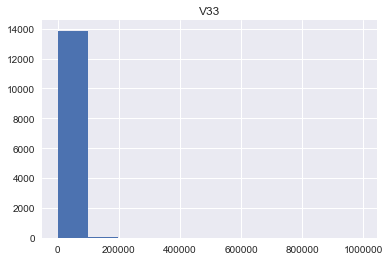

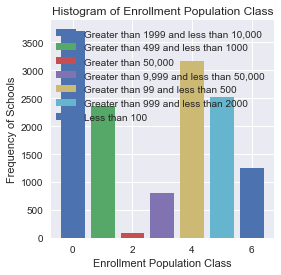

In [538]:
plt.figure(figsize=(4,4))


plt.xlabel('Enrollment Population Class')
plt.ylabel('Frequency of Schools')
plt.title('Histogram of Enrollment Population Class')


for i in range(0,7):
    plt.bar(i, df_pop_count["Enrollment Size Class"][i], label = list(df_pop_sum.index)[i])
plt.legend()
plt.show()
plt.close()

In [539]:
print(df[df["Enrollment Size Class"] == "Greater than 50,000"].count()[0])

93


In [540]:
# It may be intresting to see if instructional spending differs about the different school sizes
# "" Federal aid towards disadvantaged students, students with disabilities, and math and teacher quality
#

# It may also be interesting to see which schools have the MOST revenue per student, what schools those are, 
# and where they're located.
# Likewise for the LEAST revenue per student.


In [541]:
print(df["T06"].describe())

count    1.389300e+04
mean     1.350838e+04
std      4.978096e+04
min      0.000000e+00
25%      7.080000e+02
50%      2.968000e+03
75%      1.015000e+04
max      2.304656e+06
Name: T06, dtype: float64


https://www.urban.org/sites/default/files/publication/24216/412959-Residential-Property-Taxes-in-the-United-States.PDF

Mean Property Tax: $2,430 

Standard Deviation: $1,599


In [542]:
pt_mean = 2430
pt_sd = 1599

property_taxes = df["T06"].dropna()
bin_names = ["Low", "Below Average", "Average", "Above Average", "High"]
pt_bins = pd.cut(property_taxes, [pt_mean-2*pt_sd, pt_mean-1*pt_sd, pt_mean, pt_mean+1*pt_sd, pt_mean+2*pt_sd, math.inf], labels = bin_names)

pt_taxes = pd.DataFrame(property_taxes.groupby(pt_bins).count())
df["Property Tax Class"] = pt_bins
df.head()


,STATE,NAME,CONUM,CBSA,SCHLEV,V33,TOTALREV,TFEDREV,C14,C15,...,V22,V24,V38,V30,_19H,_31F,_41F,W61,Enrollment Size Class,Property Tax Class
0,1,AUTAUGA COUNTY SCHOOL DISTRICT,1001,33860,3,9664.0,79665.0,7574.0,1791.0,2179.0,...,705.0,1672.0,122.0,1126.0,49431.0,2992.0,63042.0,8617.0,"Greater than 1999 and less than 10,000",High
1,1,BALDWIN COUNTY SCHOOL DISTRICT,1003,19300,3,30596.0,330317.0,23602.0,5729.0,7207.0,...,3787.0,3219.0,744.0,2924.0,337160.0,13027.0,423220.0,71370.0,"Greater than 9,999 and less than 50,000",High
2,1,BARBOUR COUNTY SCHOOL DISTRICT,1005,0,3,925.0,10519.0,2518.0,1279.0,323.0,...,68.0,196.0,20.0,134.0,8024.0,304.0,7720.0,646.0,Greater than 499 and less than 1000,Below Average
3,1,EUFAULA CITY SCHOOL DISTRICT,1005,0,3,2829.0,26076.0,3374.0,1035.0,596.0,...,190.0,176.0,141.0,346.0,0.0,0.0,0.0,7478.0,"Greater than 1999 and less than 10,000",Average
4,1,BIBB COUNTY SCHOOL DISTRICT,1007,13820,3,3357.0,31825.0,3586.0,856.0,980.0,...,223.0,653.0,119.0,474.0,22155.0,1190.0,20965.0,5400.0,"Greater than 1999 and less than 10,000",Below Average


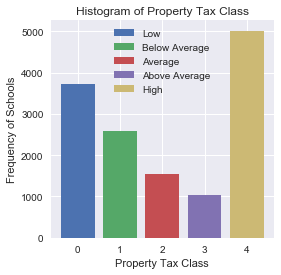

In [543]:
plt.figure(figsize=(4,4))

plt.xlabel('Property Tax Class')
plt.ylabel('Frequency of Schools')
plt.title('Histogram of Property Tax Class')

for i in range(0,5):
    plt.bar(i, pt_taxes["T06"][i], label = list(pt_taxes.index)[i])
plt.legend()
plt.show()
plt.close()

In [559]:
df["Instructional spending per student"] = df["TCURINST"]/df[df["V33"] != 0]['V33']

In [560]:
print(df["Instructional spending per student"].describe())

count    13296.000000
mean         7.807195
std          6.374398
min          0.209268
25%          5.509014
50%          6.433396
75%          8.773176
max        286.797619
Name: Instructional spending per student, dtype: float64


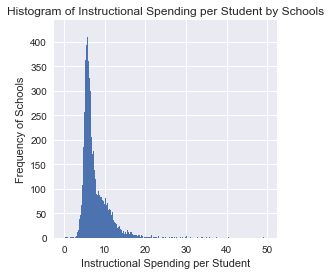

In [561]:
plt.figure(1, figsize=(4,4))
plt.xlabel('Instructional Spending per Student')
plt.ylabel('Frequency of Schools')
plt.title('Histogram of Instructional Spending per Student by Schools')
df["Instructional spending per student"].hist(range=[0, 50], bins = 500)
plt.show()
plt.close()

We'll build 3 models using simple linear regression

Model 1: Regressing on Property Taxes vs Federal Title 1 Funding (Disadvantaged Students)

Model 2: Regressing on Property Taxes vs Instructional Spending

Model 3: Regressing on Property Taxes vs Outstanding Debt at the start of the fiscal year

In [547]:
# Remove outlier property taxes and 0 property taxes. 
df_reg = df.copy()
df_reg = df_reg[(np.abs(stats.zscore(df_reg["T06"])) < 3) & (df_reg["T06"] != 0)]

taxes = df_reg["T06"]
title1 = df_reg["C14"]
spending = df_reg["TCURINST"]
debt = df_reg["_19H"]

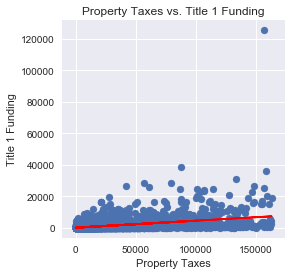

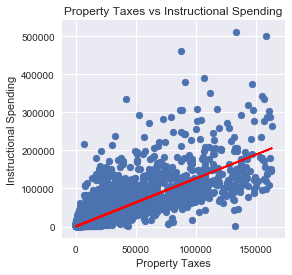

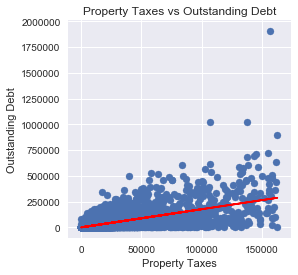

In [548]:
plt.figure(1, figsize=(4,4))
myOLS_title1 = sm.OLS(title1,taxes).fit()
plt.plot(taxes, myOLS_title1.predict(taxes), color = 'red')
plt.scatter(taxes,title1)
plt.title("Property Taxes vs. Title 1 Funding")
plt.xlabel("Property Taxes")
plt.ylabel("Title 1 Funding")
plt.show()
plt.close()

plt.figure(2, figsize=(4,4))
myOLS_spending = sm.OLS(spending,taxes).fit()
plt.plot(taxes, myOLS_spending.predict(taxes), color = 'red')
plt.scatter(taxes,spending)
plt.title("Property Taxes vs Instructional Spending")
plt.xlabel("Property Taxes")
plt.ylabel("Instructional Spending")
plt.show()
plt.close()

plt.figure(3, figsize = (4,4))
myOLS_debt = sm.OLS(debt, taxes).fit()
plt.plot(taxes, myOLS_debt.predict(taxes), color = 'red')
plt.scatter(taxes,debt)
plt.title("Property Taxes vs Outstanding Debt")
plt.xlabel("Property Taxes")
plt.ylabel("Outstanding Debt")
plt.show()
plt.close()

In [549]:
title1.isnull().sum()
taxes.isnull().sum()
len(title1) == len(taxes)

True

In [550]:
# Partitioning validation and training data

taxes.shape
train_num = int(np.round(taxes.shape[0]*.8))

taxes_train = taxes[0:train_num]
taxes_valid = taxes[train_num:]
title1_train = title1[0:train_num]
title1_valid = title1[train_num:]
spending_train = spending[0:train_num]
spending_valid = spending[train_num:]
debt_train = debt[0:train_num]
debt_valid = debt[train_num:]

In [551]:
myOLS = sm.OLS(title1_train,taxes_train).fit()
title1_hat = myOLS.predict(taxes_valid)
title1_mse = 1/len(title1_valid)*np.dot((title1_valid - title1_hat),(title1_valid - title1_hat))
print("The MSE for the model taxes~title1 is:", title1_mse)

The MSE for the model taxes~title1 is: 2048393.15748


In [552]:
myOLS = sm.OLS(spending_train,taxes_train).fit()
spending_hat = myOLS.predict(taxes_valid)
spending_mse = 1/len(spending_valid)*np.dot((spending_valid - spending_hat),(spending_valid - spending_hat))
print("The MSE for the model taxes~spending is:", spending_mse)

The MSE for the model taxes~spending is: 287066747.999


In [553]:
myOLS = sm.OLS(debt_train,taxes_train).fit()
debt_hat = myOLS.predict(taxes_valid)
debt_mse = 1/len(debt_valid)*np.dot((debt_valid - debt_hat),(debt_valid - debt_hat))
print("The MSE for the model taxes~debt is:", debt_mse)

The MSE for the model taxes~spending is: 2681712357.44


In [554]:
# Compare MSE
print(min(title1_mse, spending_mse, debt_mse))

# The mean squared error for title 1 and taxes is most minimum, however to best line fit looks best for debt and taxes

2048393.15748


Of the three models it looks like property tax best predicts instructional spending.

Let's use recursive feature selection to help us find even better indicators of instructional spending.

In [555]:
df.columns

Index(['STATE', 'NAME', 'CONUM', 'CBSA', 'SCHLEV', 'V33', 'TOTALREV',
       'TFEDREV', 'C14', 'C15', 'C16', 'C20', 'C25', 'TSTREV', 'C01', 'C10',
       'C13', 'TLOCREV', 'T06', 'D11', 'A09', 'A13', 'U22', 'U97', 'TOTALEXP',
       'TCURELSC', 'TCURINST', 'E13', 'TCURSSVC', 'E17', 'E07', 'E08', 'E09',
       'V40', 'V45', 'V90', 'TCUROTH', 'E11', 'NONELSEC', 'TCAPOUT', 'F12',
       'K09', 'K10', 'Q11', 'I86', 'Z32', 'Z33', 'V11', 'V13', 'V15', 'V17',
       'V21', 'V23', 'V37', 'V29', 'Z34', 'V10', 'V12', 'V14', 'V16', 'V18',
       'V22', 'V24', 'V38', 'V30', '_19H', '_31F', '_41F', 'W61',
       'Enrollment Size Class', 'Property Tax Class',
       'Instructional spending per student'],
      dtype='object')

In [556]:
df["_19H"].describe()
df["Debt Class"] = df["_19H"] ==  0
print(df[df["Debt Class"] == True].count(), df[df["Debt Class"] == False].count())

STATE                                 2808
NAME                                  2808
CONUM                                 2808
CBSA                                  2808
SCHLEV                                2808
V33                                   2808
TOTALREV                              2808
TFEDREV                               2808
C14                                   2808
C15                                   2808
C16                                   2808
C20                                   2808
C25                                   2808
TSTREV                                2808
C01                                   2808
C10                                   2808
C13                                   2808
TLOCREV                               2808
T06                                   2808
D11                                   2808
A09                                   2808
A13                                   2808
U22                                   2808
U97        

In [557]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]

In [572]:
#Preprocess columns
taxes = df["T06"]
spending = df["TOTALEXP"]
title1 = df["C14"]
idea = df["C15"]
mstq = df["C16"]
fedrev = df["C20"]
debt = df["Debt Class"]


scaler = MinMaxScaler()
categories = [taxes, spending, title1, idea, mstq, fedrev, debt]
scaler.fit(categories)
MinMaxScaler(copy=True, feature_range=(0, 1))
print(scaler.data_max_)
    
data_x = np.column_stack(scaler.transform(categories))
data_y = np.reshape(debt, (data_x.shape[0], 1))

train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.10, random_state=42)

[  76069.  297083.   10314. ...,   25150.   15825.    6757.]


C:\Users\brand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [573]:
print(train_x.shape, train_y.shape)

(12503, 7) (12503, 1)


In [574]:
print(valid_x.shape, valid_y.shape)

(1390, 7) (1390, 1)


In [580]:
weights = np.asarray([np.random.rand() for i in range(train_x.shape[1])]).reshape(train_x.shape[1], 1)
weights /= np.linalg.norm(weights)
losses = []
accuracies = []
epsilon = 0.001
num_iterations = 500

for i in range(500):
    diff = epsilon * gradient(train_x, train_y, weights, False)
    weights = weights - diff
    losses.append(loss(train_x, train_y, weights))
    accuracies.append(accuracy(test_x, valid_y, weights))

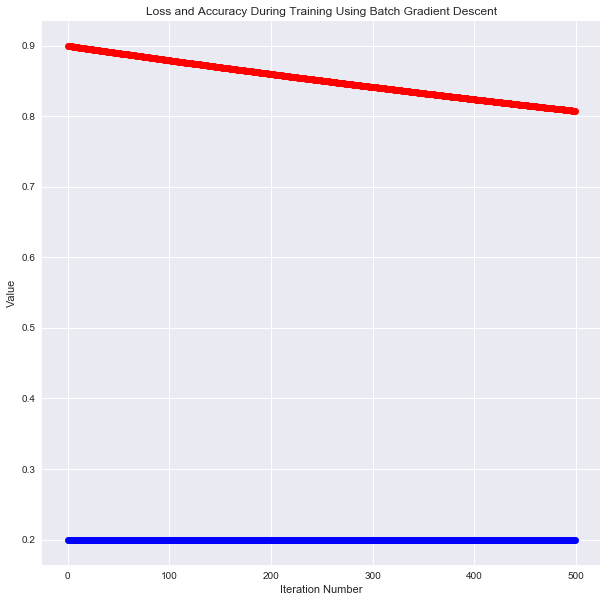

0.19928057554


In [581]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), accuracies, 'bo')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(valid_x, valid_y, weights))